# All 4 ML Models Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

import sklearn.metrics

import pickle
import matplotlib.pyplot as plt

In [2]:
# Get preprocessed data
dataSet = pd.read_csv('dataPreprocessingFilter.csv')
dataSet.head()

,class,tweet
0,0,RT bitch nooooo ! Kim mine dreaming
1,0,CNT nobody mad choose I ca n't mad bitch nigga...
2,0,"I 'll bitch I . I n't like , f * ck 'll happen ."
3,0,ha bitch angry bitch taller older fake ass boy...
4,0,lol lil bitch


## Vectorizing Tweets (TF-IDF)

In [3]:
# Vectorizing Data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(dataSet['tweet'])
features = vect.get_feature_names_out()

print("Number of features: {}\n".format(len(features)))
print("First 50 features: {}\n".format(features[:50]))

Number of features: 68505

First 50 features: ['00' '00 bet' '000' '000 birds' '000 deaths' '000 dollars' '000 florida'
 '000 followers' '000 person' '000 ppl' '000 the' '000 ways' '000 worth'
 '003' '003 http' '02' '02 charcoal' '0221' '0221 http' '03otpzxcbi' '05'
 '05 rain' '08' '08 12' '08cqv2vccx' '09' '09 years' '0_0' '0dvazwlq2q'
 '0jelcx0nku' '0l0kg' '0lowkclb' '0lrablmhb2' '0lrablmhb2 http'
 '0mk1w8reak' '0ntcwbrmmk' '0panscimew' '0panscimew bitch' '0tkum7lh1f'
 '0ushmogzdr' '0vram5pfjl' '0xdlxtoci8' '0xhpbrl9eq' '0xkfnw3luf' '10'
 '10 000' '10 10' '10 29' '10 barely' '10 charlie']



In [4]:
# Test Train Split 
X_Data = dataSet['tweet']
Y_Data = dataSet['class']
X_Data = vect.transform(X_Data)

x_train, x_test, y_train, y_test = train_test_split(
    X_Data, 
    Y_Data, 
    test_size=0.2, 
    random_state=42
)
print("X_data:", (x_train.shape))
print("Y_data:", (y_train.shape))
print("x_test:", (x_test.shape))
print("y_test:", (y_test.shape))

X_data: (6660, 68505)
Y_data: (6660,)
x_test: (1666, 68505)
y_test: (1666,)


In [5]:
# Validation Split (to choose best K value)
x2_train, x_vali, y2_train, y_vali = train_test_split(
    x_train, 
    y_train, 
    test_size=0.15, 
    random_state=42
)
print("X2_data:", (x_train.shape))
print("Y2_data:", (y_train.shape))
print("x_vali:", (x_vali.shape))
print("y_vali:", (y_vali.shape))

X2_data: (6660, 68505)
Y2_data: (6660,)
x_vali: (999, 68505)
y_vali: (999,)


## Training KNN Model

In [6]:
# Function to help us determin the best K value

def knn(k):
    kNN = KNeighborsClassifier(n_neighbors = k)
    kNN.fit(x2_train, y2_train)
    predicted = kNN.predict(x_vali)
    return(sklearn.metrics.accuracy_score(predicted, y_vali))


Text(0, 0.5, 'Accuracy Score')

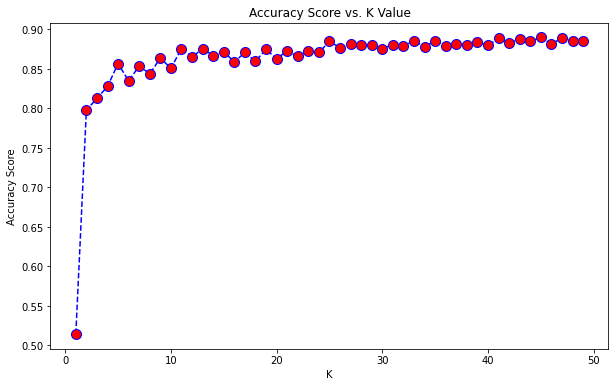

In [7]:
# Compare different k values
accuracy = []
for i in range(1,50):
    accuracy.append(knn(i))
    
# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,color='blue', linestyle='dashed', marker='o', markerfacecolor= 'red', markersize=10)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

###### Looks like K=11 is optimal

In [8]:
# Set k=11 for KNN
kNN = KNeighborsClassifier(n_neighbors = 11)
kNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [9]:
# save the model to disk
filename_kNN = 'finalized_model_kNN.sav'
pickle.dump(kNN, open(filename_kNN, 'wb'))

In [10]:
# load the model from disk
loaded_model_kNN = pickle.load(open(filename_kNN, 'rb'))
result_kNN = loaded_model_kNN.score(x_test, y_test)
print("Model kNN results: ", result_kNN)

Model kNN results:  0.8763505402160864


### Analysis

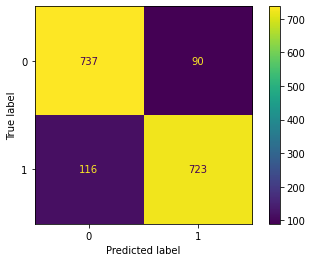

In [11]:
# Confusion Matrix
kNN_pred = kNN.predict(x_test)
kNN_cm = sklearn.metrics.confusion_matrix(y_test, kNN_pred)
sklearn.metrics.ConfusionMatrixDisplay(kNN_cm).plot()

In [12]:
# Precision, Recall, and F1-score
kNN_precision, kNN_recall, kNN_F1, kNN_support = sklearn.metrics.precision_recall_fscore_support(y_test, kNN_pred, average='binary')
print("Accuracy: ", result_kNN)
print("Error Rate: ", 1-result_kNN)
print("Precision: ", kNN_precision)
print("Recall: ", kNN_recall)
print("F1-score: ", kNN_F1)

Accuracy:  0.8763505402160864
Error Rate:  0.12364945978391362
Precision:  0.8892988929889298
Recall:  0.8617401668653158
F1-score:  0.8753026634382567


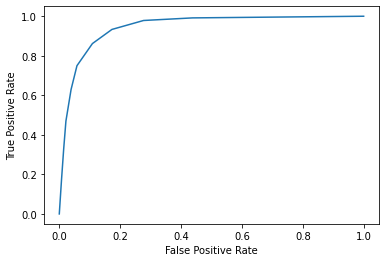

In [13]:
kNN_y_score = kNN.predict_proba(x_test)
kNN_fpr, kNN_tpr, _ = sklearn.metrics.roc_curve(y_test, kNN_y_score[:,1], pos_label=1)
kNN_roc_display = sklearn.metrics.RocCurveDisplay(fpr=kNN_fpr, tpr=kNN_tpr).plot()

## Training Multinomial Naive Bayes Model

In [14]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [15]:
# save the model to disk
filename_nb = 'finalized_model_NB.sav'
pickle.dump(nb, open(filename_nb, 'wb'))

In [16]:
# load the model from disk
loaded_model_nb = pickle.load(open(filename_nb, 'rb'))
result_nb = loaded_model_nb.score(x_test, y_test)
print("Model NB results: ", result_nb)

Model NB results:  0.9111644657863145


### Analysis

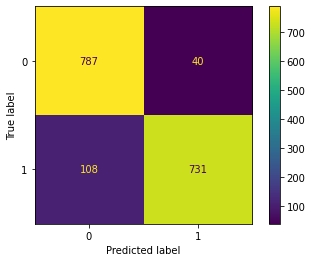

In [17]:
# Confusion Matrix
predicted_nb = nb.predict(x_test)
nb_cm = sklearn.metrics.confusion_matrix(y_test, predicted_nb)
sklearn.metrics.ConfusionMatrixDisplay(nb_cm).plot()

In [18]:
# Precision, Recall, and F1-score
nb_precision, nb_recall, nb_F1, nb_support = sklearn.metrics.precision_recall_fscore_support(y_test, predicted_nb, average='binary')
print("Accuracy: ", result_nb)
print("Error Rate: ", 1-result_nb)
print("Precision: ", nb_precision)
print("Recall: ", nb_recall)
print("F1-score: ", nb_F1)

Accuracy:  0.9111644657863145
Error Rate:  0.08883553421368551
Precision:  0.9481193255512321
Recall:  0.8712753277711561
F1-score:  0.9080745341614906


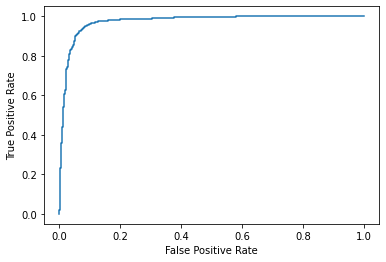

In [19]:
nb_y_score = nb.predict_proba(x_test)
nb_fpr, nb_tpr, _ = sklearn.metrics.roc_curve(y_test, nb_y_score[:,1], pos_label=1)
nb_roc_display = sklearn.metrics.RocCurveDisplay(fpr=nb_fpr, tpr=nb_tpr).plot()

## Training SVM Model

In [20]:
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [21]:
# save the model to disk
filename_SVM = 'finalized_model_SVM.sav'
pickle.dump(SVM, open(filename_SVM, 'wb'))

In [22]:
# load the model from disk
loaded_model_SVM = pickle.load(open(filename_SVM, 'rb'))
result_SVM = loaded_model_SVM.score(x_test, y_test)
print("Model SVM results: ", result_SVM)

Model SVM results:  0.9345738295318127


### Analysis

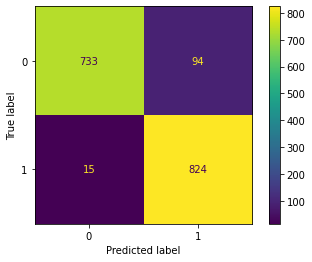

In [23]:
# Confusion Matrix
predicted_SVM = SVM.predict(x_test)
SVM_cm = sklearn.metrics.confusion_matrix(y_test, predicted_SVM)
sklearn.metrics.ConfusionMatrixDisplay(SVM_cm).plot()

In [24]:
# Precision, Recall, and F1-score
SVM_precision, SVM_recall, SVM_F1, SVM_support = sklearn.metrics.precision_recall_fscore_support(y_test, predicted_SVM, average='binary')
print("Accuracy: ", result_SVM)
print("Error Rate: ", 1-result_SVM)
print("Precision: ", SVM_precision)
print("Recall: ", SVM_recall)
print("F1-score: ", SVM_F1)

Accuracy:  0.9345738295318127
Error Rate:  0.06542617046818733
Precision:  0.8976034858387799
Recall:  0.9821215733015495
F1-score:  0.9379624359704041


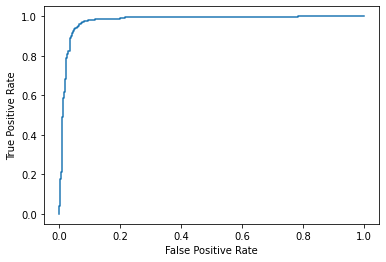

In [25]:
SVM_y_score = SVM.decision_function(x_test)
SVM_fpr, SVM_tpr, _ = sklearn.metrics.roc_curve(y_test, SVM_y_score, pos_label=1)
SVM_roc_display = sklearn.metrics.RocCurveDisplay(fpr=SVM_fpr, tpr=SVM_tpr).plot()

## Training Ensemble Model

In [26]:
# Build voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('knn', kNN),
        ('nb', nb),
        ('svc', SVM)],
        voting = 'soft'
)
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(x_train, y_train)
voting_clf.predict(x_test[:1])

array([1])

In [27]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(x_test, y_test))

knn = 0.8763505402160864
nb = 0.9111644657863145
svc = 0.9345738295318127


In [28]:
voting_clf.score(x_test, y_test)

0.9471788715486195

In [29]:
# save the model to disk
filename_ensemble = 'finalized_model_ensemble.sav'
pickle.dump(voting_clf, open(filename_ensemble, 'wb'))

In [30]:
# load the model from disk
loaded_model_ensemble = pickle.load(open(filename_ensemble, 'rb'))
result_ensemble = loaded_model_ensemble.score(x_test, y_test)
print("Model Ensemble results: ", result_ensemble)

Model Ensemble results:  0.9471788715486195


### Analysis

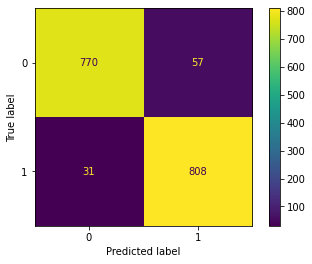

In [31]:
# Confusion Matrix
predicted_ens = voting_clf.predict(x_test)
ens_cm = sklearn.metrics.confusion_matrix(y_test, predicted_ens)
sklearn.metrics.ConfusionMatrixDisplay(ens_cm).plot()

In [32]:
# Precision, Recall, and F1-score
ens_precision, ens_recall, ens_F1, ens_support = sklearn.metrics.precision_recall_fscore_support(y_test, predicted_ens, average='binary')
print("Accuracy: ", result_ensemble)
print("Error Rate: ", 1-result_ensemble)
print("Precision: ", ens_precision)
print("Recall: ", ens_recall)
print("F1-score: ", ens_F1)

Accuracy:  0.9471788715486195
Error Rate:  0.05282112845138054
Precision:  0.9341040462427745
Recall:  0.9630512514898689
F1-score:  0.948356807511737


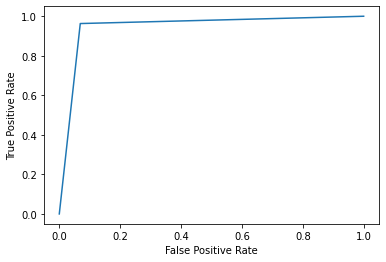

In [33]:
ens_fpr, ens_tpr, _ = sklearn.metrics.roc_curve(y_test, predicted_ens, pos_label=1)
ens_roc_display = sklearn.metrics.RocCurveDisplay(fpr=ens_fpr, tpr=ens_tpr).plot()

### To conclude, the training ensemble method has the best results for precision, recall, and F1-score. Some intersting observation we noticed is Naive Bayes ML has the higest precision, while KNN has the least scores for all three. 